In [105]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [106]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [107]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [108]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [109]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)



In [110]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [111]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [112]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [113]:
# Find the most recent date in the data set.
mostrecent=(session.query(Measurement.date)
                    .order_by(Measurement.date.desc())
                    .first())
mostrecent

('2017-08-23',)

One Year Ago Query Date: 2016-08-22


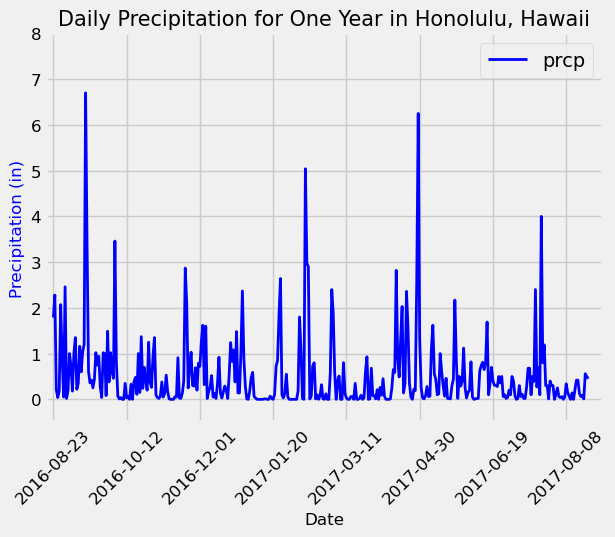

In [114]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
mostrecent

# Calculate the date one year from the last date in data set.
oneyearago = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('One Year Ago Query Date:', oneyearago)


# Perform a query to retrieve the data and precipitation scores
precipitation =(session.query(Measurement.date,func.max(Measurement.prcp))
                  .filter(func.strftime('%Y-%m-%d',Measurement.date) > oneyearago)
                  .group_by(Measurement.date)
                  .all())
precipitation

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(precipitation, columns=['date', 'prcp'])
precipitation_df.set_index('date',inplace=True)
precipitation_df.head(10)

# Sort the dataframe by date
precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(linewidth=2,alpha=1,rot=45, 
             color='blue')

plt.xlim(-5,375)
plt.ylim(-0.5,8)
plt.yticks(size=12)
plt.xticks(fontsize=12)
plt.xlabel('Date',fontsize=12,color='black')
plt.ylabel('Precipitation (in)',fontsize=12,color='blue')
plt.title('Daily Precipitation for One Year in Honolulu, Hawaii',fontsize=15)

plt.show()


In [115]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()


,prcp
count,366.000000
mean,0.520765
std,0.830728
min,0.000000
25%,0.040000
50%,0.250000
75%,0.672500
max,6.700000


# Exploratory Station Analysis

In [116]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.id).count()


9

In [117]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

activestations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

activestations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [118]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostactive = activestations[0][0]

session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.station == mostactive).all()

[(54.0, 71.66378066378067, 85.0)]

In [119]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station 
results = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == mostactive).\
                filter(Measurement.date >= oneyearago).all()
results_df = pd.DataFrame(results)
results_df.set_index('station', inplace=True)
results_df.head()

,tobs
station,
USC00519281,78.0
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0


<function matplotlib.pyplot.show(close=None, block=None)>

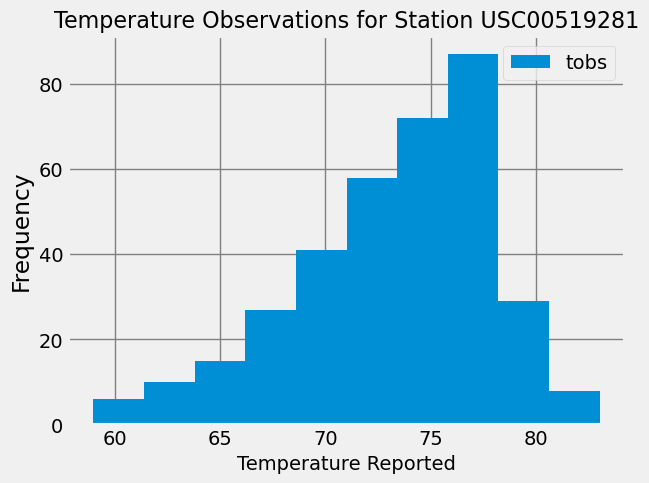

In [120]:
#and plot the results as a histogram
results_df.plot.hist()
plt.grid(color="grey")
plt.title("Temperature Observations for Station " + mostactive, fontsize=16)
plt.xlabel("Temperature Reported", fontsize=14)
plt.savefig("../StationTemps.png")
plt.show

# Close session

In [121]:
# Close Session
session.close()